In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
import keras

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [55]:
directory_crime = "/Users/ragharao/Desktop/citadel/Europe Regional 2023 Datasets/Traffic, Investigations _ Other/crimes.csv"
df_crime = pd.read_csv(directory_crime)

cleandf_crime = pd.DataFrame()

year = []
month = []
day = []
time = []
for i in df_crime['dispatch_date_time']:
    i_datetime = i.split(' ')
    i_date = i_datetime[0].split('-')
    
    year.append(int(i_date[0]))
    month.append(int(i_date[1]))
    day.append(int(i_date[2]))
    
    i_time = float(i_datetime[1][:2])+float(i_datetime[1][3:5])/60
    time.append(i_time)

cleandf_crime['year'] = year
cleandf_crime['month'] = month
cleandf_crime['day'] = day
cleandf_crime['time'] = time


assault, burglary, rape, robbery, theft, other_crime = [], [], [], [], [], []

for i in df_crime['text_general_code']:
    c = [0,0,0,0,0,0]
    if 'Assault' in i:
        c[0] = 1
    elif 'Burglary' in i:
        c[1] = 1
    elif 'Rape' in i:
        c[2] = 1
    elif 'Robbery' in i:
        c[3] = 1
    elif 'Theft' in i:
        c[4] = 1
    else:
        c[5] = 1
    assault.append(c[0])
    burglary.append(c[1])
    rape.append(c[2])
    robbery.append(c[3])
    theft.append(c[4])
    other_crime.append(c[5])

cleandf_crime['assault'] = assault
cleandf_crime['burglary'] = burglary
cleandf_crime['rape'] = rape
cleandf_crime['robbery'] = robbery
cleandf_crime['theft'] = theft
cleandf_crime['other_crime'] = other_crime  

cleandf_crime['latitude'] = df_crime['lat']
cleandf_crime['longitude'] = df_crime['lng']

crime_x = cleandf_crime.iloc[:,:4]
crime_y_type = cleandf_crime.iloc[:,4:10]
#crime_y_loc = cleandf_crime.iloc[:,1:]
crime_xstd = MinMaxScaler().fit_transform(crime_x.values)
#crime_y_locstd = MinMaxScaler().fit_transform(crime_y_loc.values)


In [79]:
print(crime_y_type.shape)
x1 = sum(cleandf_crime['assault'])
x2 = sum(cleandf_crime['burglary'])
x3 = sum(cleandf_crime['rape'])
x4 = sum(cleandf_crime['robbery'])
x5 = sum(cleandf_crime['theft'])
x6 = sum(cleandf_crime['other_crime'])

print(x6/1593142)
    

(1593142, 6)
0.4501318777610533


In [57]:
#predict type of crime

epochs = 100
model = Sequential()
model.add(Dense(32, activation='tanh', input_dim=4))
model.add(Dense(16, activation='tanh'))
model.add(Dense(6, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
graph = model.fit(x=crime_xstd,y=crime_y_type,batch_size=256,validation_split=0.1,epochs=epochs,verbose=0)

val_loss = graph.history['val_loss']
tr_loss = graph.history['loss']
epoch_list = np.array([i for i in range(epochs)])
best_fit = (np.poly1d(np.polyfit(epoch_list, np.array(val_loss), 3)))(epoch_list)


In [69]:
print(print(np.argmin(best_fit[10:])))
#41
print(np.mean(val_loss))

45
None
1.3115485310554504


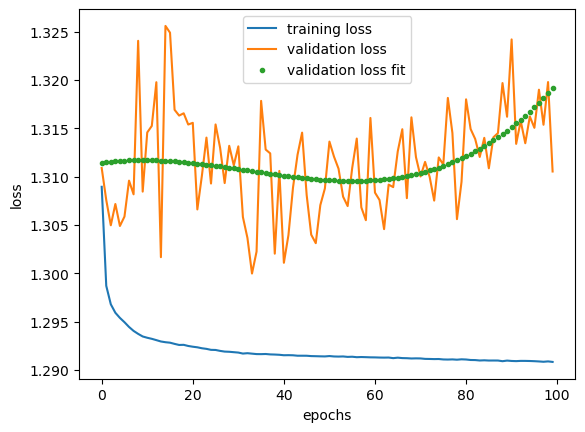

In [59]:
plt.plot(tr_loss, label='training loss')
plt.plot(val_loss, label='validation loss')
plt.plot(best_fit, '.', label='validation loss fit')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [81]:
def model_32():
    model = Sequential()
    model.add(Dense(32, activation='tanh', input_dim=4))
    model.add(Dense(16, activation='tanh'))
    model.add(Dense(6, activation='softmax'))
    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
    return model

model32= KerasClassifier(build_fn=model_32, epochs = 46, batch_size=256, verbose=0)
score_32 = cross_val_score(estimator=model32,X=crime_xstd,y=crime_y_type, cv=5)

print(abs(score_32.mean()))

/Users/ragharao/opt/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  # Remove the CWD from sys.path while we load stuff.


0.4204841136932373


In [80]:
def model_16():
    model = Sequential()
    model.add(Dense(16, activation='tanh', input_dim=4))
    model.add(Dense(6, activation='softmax'))
    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
    return model

def model_64():
    model = Sequential()
    model.add(Dense(64, activation='tanh', input_dim=4))
    model.add(Dense(32, activation='tanh'))
    model.add(Dense(16, activation='tanh'))
    model.add(Dense(6, activation='softmax'))
    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
    return model

model16= KerasClassifier(build_fn=model_16, epochs = 46, batch_size=256, verbose=0)
score_16 = cross_val_score(estimator=model16,X=crime_xstd,y=crime_y_type, cv=5)

model64= KerasClassifier(build_fn=model_64, epochs = 46, batch_size=256, verbose=0)
score_64 = cross_val_score(estimator=model64,X=crime_xstd,y=crime_y_type, cv=5)

print(abs(score_16.mean()))
print(abs(score_64.mean()))
    
    

/Users/ragharao/opt/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
/Users/ragharao/opt/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


0.4426811456680298
0.4160639107227325
